In [1]:
# PageRank、图论与推荐系统

In [6]:
## LPA

In [2]:
### iGraph

In [20]:
import igraph

In [21]:
import os
path = os.path.expanduser('~/data/')

In [38]:
import cairo
g = igraph.Graph.Read_GML(path + 'BI/football.gml')
igraph.plot(g)
print(g.community_label_propagation())

AttributeError: Plotting not available; please install pycairo or cairocffi

In [ ]:
### Networkx

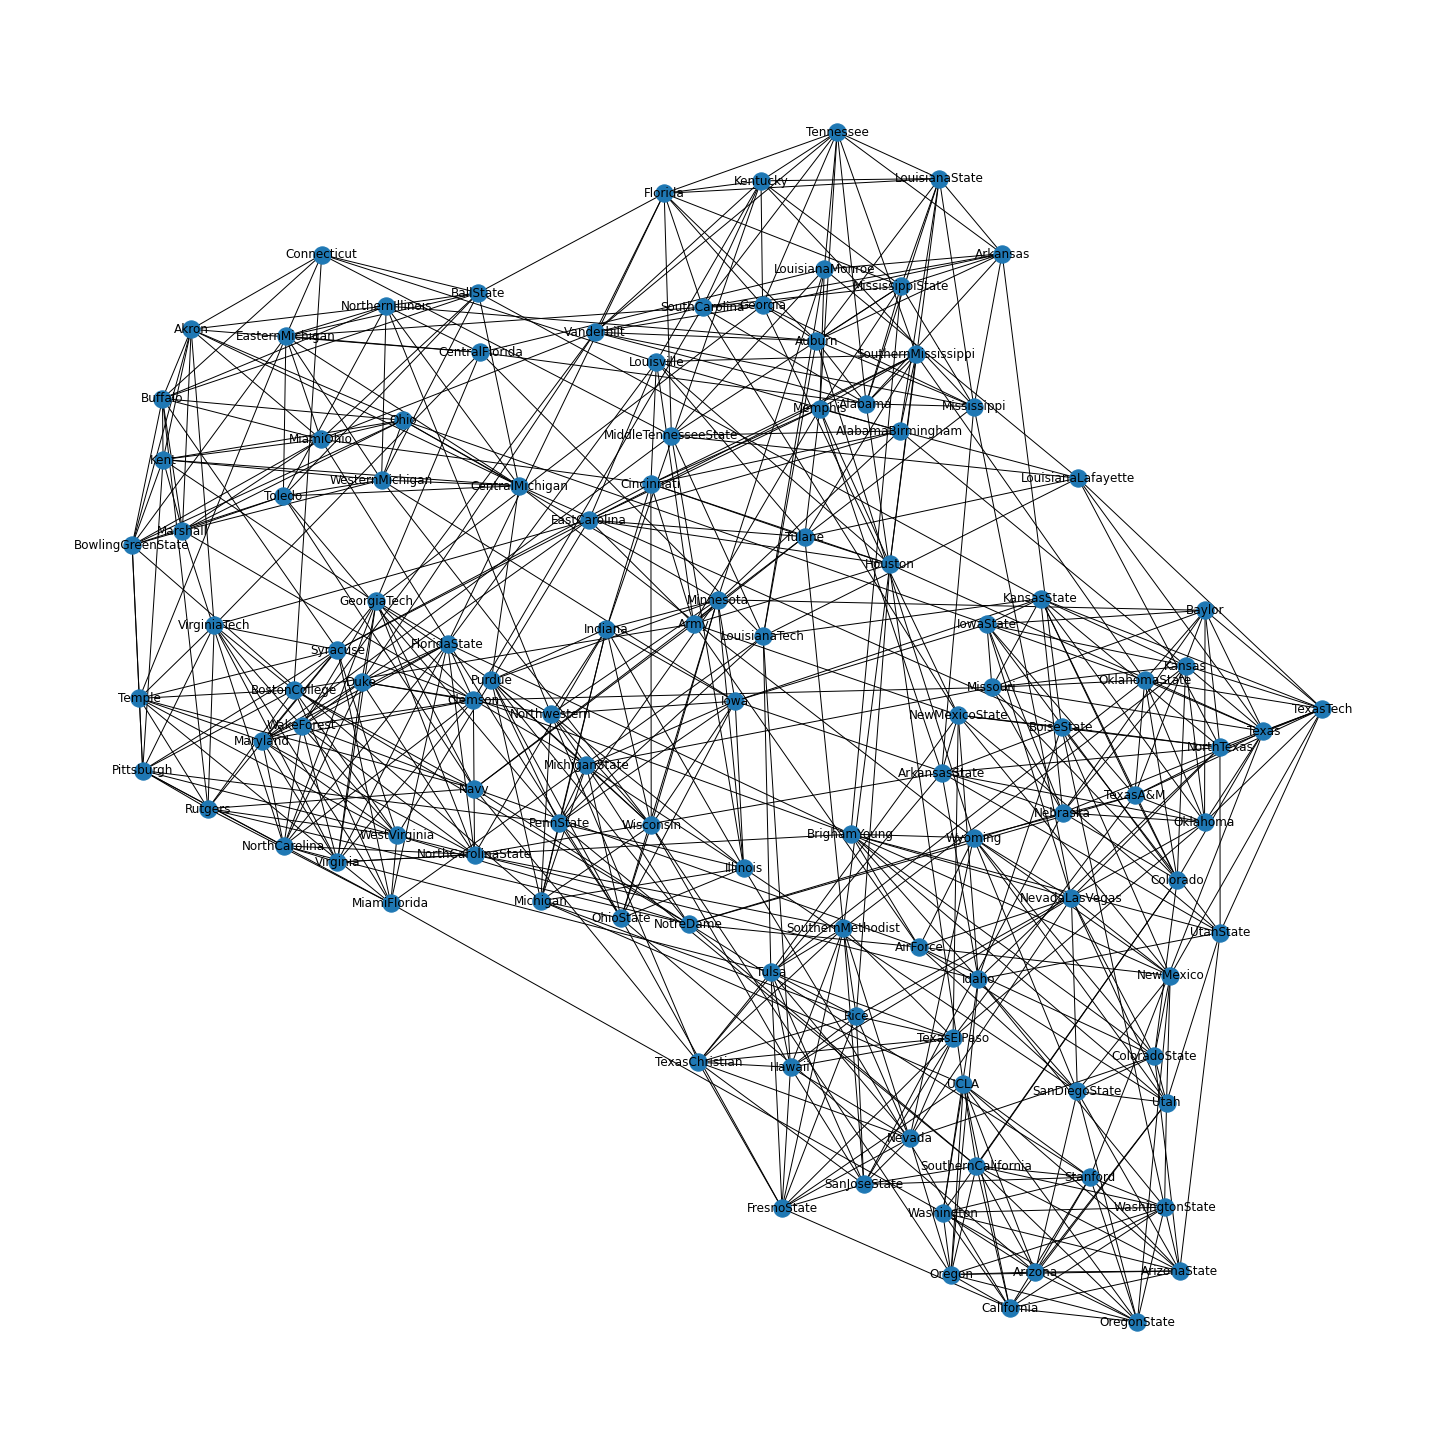

[{'SanDiegoState', 'NewMexico', 'ColoradoState', 'AirForce', 'Wyoming', 'Utah', 'NevadaLasVegas', 'BrighamYoung'}, {'Maryland', 'NorthCarolinaState', 'NorthCarolina', 'Clemson', 'Virginia', 'WakeForest', 'Duke', 'FloridaState', 'GeorgiaTech'}, {'Iowa', 'Michigan', 'Minnesota', 'Indiana', 'Wisconsin', 'Purdue', 'OhioState', 'MichiganState', 'Illinois', 'PennState', 'Northwestern'}, {'KansasState', 'Baylor', 'Texas', 'Oklahoma', 'IowaState', 'Missouri', 'TexasTech', 'OklahomaState', 'Colorado', 'Nebraska', 'Kansas', 'TexasA&M'}, {'UCLA', 'NewMexicoState', 'SouthernCalifornia', 'BoiseState', 'Washington', 'Arizona', 'NorthTexas', 'Stanford', 'WashingtonState', 'OregonState', 'California', 'Oregon', 'Idaho', 'UtahState', 'ArizonaState', 'ArkansasState'}, {'Toledo', 'NorthernIllinois', 'EasternMichigan', 'BallState', 'CentralMichigan', 'WesternMichigan'}, {'Mississippi', 'LouisianaState', 'LouisianaMonroe', 'Arkansas', 'LouisianaLafayette', 'Alabama', 'Tennessee', 'Auburn', 'CentralFlorida'

In [40]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# 数据加载
G=nx.read_gml(path + 'BI/football.gml')
# 可视化
plt.figure(figsize=(20,20))
nx.draw(G,with_labels=True) 
plt.show()
# 社区发现
communities = list(community.label_propagation_communities(G))
print(communities)
print(len(communities))

In [24]:
## Shortest path

In [25]:
### Floyd

In [41]:
import numpy as np
a = np.array([[0, 12, 999, 999, 999, 16, 14], 
			  [12, 0, 10,  999, 999, 7, 999],
			  [999,10, 0,  3,   5,   6, 999],
			  [999,999,3,  0,   4,  999,999],
			  [999,999,5,  4,   0,   2, 8],
			  [16, 7,  6, 999,  2,   0, 9],
			  [14, 999,999,999, 8,   9, 0]])
n=7

In [42]:
# 使用Floyd算法
for k in range(0, n):
	for i in range(0, n):
		for j in range(0, n):
			if a[i][k] + a[k][j] < a[i][j]:
				a[i][j] = a[i][k] + a[k][j]

# 输出结果
print('各城市之间的最短距离：', a)
print('城市D到其他城市的最短距离：', a[3])

各城市之间的最短距离： [[ 0 12 22 22 18 16 14]
 [12  0 10 13  9  7 16]
 [22 10  0  3  5  6 13]
 [22 13  3  0  4  6 12]
 [18  9  5  4  0  2  8]
 [16  7  6  6  2  0  9]
 [14 16 13 12  8  9  0]]
城市D到其他城市的最短距离： [22 13  3  0  4  6 12]


In [43]:
### Networkx shortest

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
G=nx.read_gml(path + 'BI/football.gml')
plt.figure(figsiz=(20,20))
nx.draw(G,with_labels=True) 
plt.show() 
print(nx.shortest_path(G, source='Buffalo', target='Kent'))
print(nx.shortest_path(G, source='Buffalo', target='Rice'))

TypeError: __init__() got an unexpected keyword argument 'figsiz'

In [31]:
# Dijkstra算法
print(nx.single_source_dijkstra_path(G, 'Buffalo'))
print(nx.multi_source_dijkstra_path(G, {'Buffalo', 'Rice'}))
# Flody算法
print(nx.floyd_warshall(G, weight='weight'))

{'Buffalo': ['Buffalo'], 'NorthernIllinois': ['Buffalo', 'NorthernIllinois'], 'Akron': ['Buffalo', 'Akron'], 'BallState': ['Buffalo', 'BallState'], 'BowlingGreenState': ['Buffalo', 'BowlingGreenState'], 'Syracuse': ['Buffalo', 'Syracuse'], 'Connecticut': ['Buffalo', 'Connecticut'], 'Kent': ['Buffalo', 'Kent'], 'MiamiOhio': ['Buffalo', 'MiamiOhio'], 'Ohio': ['Buffalo', 'Ohio'], 'Rutgers': ['Buffalo', 'Rutgers'], 'Marshall': ['Buffalo', 'Marshall'], 'Northwestern': ['Buffalo', 'NorthernIllinois', 'Northwestern'], 'WesternMichigan': ['Buffalo', 'NorthernIllinois', 'WesternMichigan'], 'Auburn': ['Buffalo', 'NorthernIllinois', 'Auburn'], 'CentralFlorida': ['Buffalo', 'NorthernIllinois', 'CentralFlorida'], 'CentralMichigan': ['Buffalo', 'NorthernIllinois', 'CentralMichigan'], 'EasternMichigan': ['Buffalo', 'NorthernIllinois', 'EasternMichigan'], 'Toledo': ['Buffalo', 'NorthernIllinois', 'Toledo'], 'VirginiaTech': ['Buffalo', 'Akron', 'VirginiaTech'], 'KansasState': ['Buffalo', 'BallState', '

In [32]:
## Textrank

In [33]:
### Textrank SNOWNLP

In [35]:
from snownlp import SnowNLP

In [36]:
text = '一个超过5000万人关注的大项目，您参加了吗?央视新闻新媒体推出武汉火神山、雷神山医院建设现场24小时不间断直播，短短几天时间吸引无数关心医院建设的网友围观。'\
	+ '其中最受广大网友关注的火神山两路镜头对准的正是中建三局三公司承建区域，截至30日13:50，在看人数已突破5000万。热心的网友们自称为 云监工 或 网络包工头，'\
	+ '自发在评论区实行 两班倒 打卡 监督 还热切、尽职的互动交流起了工作。这一称号数度登上微博热搜。繁忙却相对单调枯燥的施工画面，因为云监工们脑洞大开的评论而妙趣横生，'\
	+ '他们给所有的机器都起好了名字，根据颜色亲昵的叫上了小红、小黄、小蓝，没事就来视频里蹲自己喜欢的机器出现还编起了段子，绘起了同人。'\
	+ '不仅现场的各种机械设备有了粉丝团，有细心者甚至数出了直播画面中中建三局三公司这一施工区域中出镜的管理人员与工友人数。'\
	+ '记者了解到，火神山医院建设方之一的中建三局三公司在四川也有不少项目，德阳市妇女儿童专科医院项目也是该公司在建设。'\
	+ '最后，让我们一起以比直播镜头更近、更鲜活的视角来重温让万千网友为之惊叹鼓舞的奋斗时刻!'
snow = SnowNLP(text)
# 打印关键词
print(snow.keywords(20))

# TextRank算法
print(snow.summary(10))
print(snow.sentiments)

['友', '医院', '中', '建设', '上', '还', '山', '火神', '机器', '公司', '关注', '三', '现场', '大', '直播', '云', '工', '项目', '施工', '评论']
['有细心者甚至数出了直播画面中中建三局三公司这一施工区域中出镜的管理人员与工友人数', '火神山医院建设方之一的中建三局三公司在四川也有不少项目', '其中最受广大网友关注的火神山两路镜头对准的正是中建三局三公司承建区域', '一个超过5000万人关注的大项目', '德阳市妇女儿童专科医院项目也是该公司在建设', '您参加了吗?央视新闻新媒体推出武汉火神山、雷神山医院建设现场24小时不间断直播', '没事就来视频里蹲自己喜欢的机器出现还编起了段子', '因为云监工们脑洞大开的评论而妙趣横生', '短短几天时间吸引无数关心医院建设的网友围观', '在看人数已突破5000万']
0.9999999984641912


In [37]:
### Textrank

In [39]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import jieba

In [40]:
text = '一个超过5000万人关注的大项目，您参加了吗?央视新闻新媒体推出武汉火神山、雷神山医院建设现场24小时不间断直播，短短几天时间吸引无数关心医院建设的网友围观。其中最受广大网友关注的火神山两路镜头对准的正是中建三局三公司承建区域，截至30日13:50，在看人数已突破5000万。热心的网友们自称为“云监工”或“网络包工头”，自发在评论区实行“两班倒”打卡“监督”还热切、尽职的互动交流起了“工作”。这一称号数度登上微博热搜。繁忙却相对单调枯燥的施工画面，因为“云监工”们脑洞大开的评论而妙趣横生，他们给所有的机器都起好了名字，根据颜色亲昵的叫上了小红、小黄、小蓝，没事就来视频里蹲自己喜欢的机器出现还编起了段子，绘起了同人。不仅现场的各种机械设备有了“粉丝团”，有细心者甚至数出了直播画面中中建三局三公司这一施工区域中出镜的管理人员与工友人数。记者了解到，火神山医院建设方之一的中建三局三公司在四川也有不少项目，德阳市妇女儿童专科医院项目也是该公司在建设。最后，让我们一起以比直播镜头更近、更鲜活的视角来重温让万千网友为之惊叹鼓舞的奋斗时刻!'

In [41]:
# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=3)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=2):
    print(item.word, item.weight)


# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/jieba.cache
Loading model cost 0.339 seconds.
Prefix dict has been built successfully.


关键词：
网友 0.029170901041798293
建设 0.02370054445078105
项目 0.020872880983641002
火神 0.020466558480708257
医院 0.019263495610185453
公司 0.01869295917346857
直播 0.017398810931183128
人数 0.01620157574010347
机器 0.016180469898700256
评论 0.016109449718166635
交流 0.015020901537043708
画面 0.0140872995467568
监工 0.014080614493744658
关注 0.014002791567125606
区域 0.01348040677421831
颜色 0.012744156598282062
现场 0.012216928076756601
施工 0.012150420220004452
中建 0.011984519756586157
鼓舞 0.011489904483475363
摘要：


In [42]:
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

2 0.14109928864004814 其中最受广大网友关注的火神山两路镜头对准的正是中建三局三公司承建区域，截至30日13:50，在看人数已突破5000万
1 0.1261373747284533 央视新闻新媒体推出武汉火神山、雷神山医院建设现场24小时不间断直播，短短几天时间吸引无数关心医院建设的网友围观
6 0.11985679806834679 不仅现场的各种机械设备有了“粉丝团”，有细心者甚至数出了直播画面中中建三局三公司这一施工区域中出镜的管理人员与工友人数


In [43]:
### Sentence Textrank

In [44]:
import jieba
import jieba.analyse
import jieba.posseg as pseg

In [45]:
#sentence = '7月23日，在万般期待中，各地2020年高考录取分数线陆续公布，拿到分数后的考生们可谓有人欢喜有人愁。安徽省当天也公布了录取分数线，其中文理科一本分数线分别为541分和515分，二本分数线分别为499分和435分。那么被称为亚洲最大的“高考工厂”毛坦厂中学高考成绩怎样？图为毛坦厂中学教室午休的考生。7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分。也就是在2020年高考中，高考镇有1万多人达到本科线，听起来多少有点让人吃惊，这个数字还不包括其他十几个省份在毛坦厂复读的数百名考生。图为高考镇放学盛大的场面。今年的高考很特殊，因为疫情课业停摆两个多月，随后高考推迟一个月才考试，而就在考试进行时，安徽歙县因为洪水语文和数学被延期考试，湖北黄梅的考生硬是蹚水去考场，而云南一地的考生，考试时还发生了地震。图为高考前，高考镇的卡点。毛坦厂镇因为高考而驰名，被称为“亚洲最大的高考工厂”，外媒曾称该镇是一座偏僻的单一产业城镇，出产的是应试机器，就像其他一些专门生产袜子或圣诞饰品的中国乡镇一样心无旁骛。毛坦厂镇今年参加高考的考生人数超过1.7万人，涉及全国十多个省份。图为考生在上晚自习。据悉，毛坦厂镇面积只有3.5平方公里，人口不过万余人，从1999年后，毛坦厂中学借高考复读声名鹊起，每年都要吸引2万多学生和1万多陪读家长，整个小镇接近5万人。租房、生活、学习，众多学生和家长的到来，小镇的经济都围绕着“高考”在转。图为每天早晨，陪读家长在洗衣。在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封。图为高考前，考生进入学校测量体温。也正是如此，今年的高考镇比往年低调了很多，连往年最热闹的送考节也没有举行，而是和其他所有普通学校一样，用几辆大巴将考生送到市区考试。图为往年的送考节。和衡水中学不一样，到高考镇来学习的都是普通考生，还有很多“落榜”生。有人说，高考镇太过严格，然而今年1万多人达本科线，意味着经过一年的努力，这一万多名考生或将改变命运，或许这就是高考镇存在的意义。'
sentence = '一个超过5000万人关注的大项目，您参加了吗?央视新闻新媒体推出武汉火神山、雷神山医院建设现场24小时不间断直播，短短几天时间吸引无数关心医院建设的网友围观。'

In [46]:
# 获取分词
seg_list = jieba.cut(sentence, cut_all=False)
print(' '.join(seg_list))
# 获取分词和词性
words = pseg.cut(sentence)
for word, flag in words:
	print('%s, %s' % (word, flag))

一个 超过 5000 万人 关注 的 大 项目 ， 您 参加 了 吗 ? 央视 新闻 新 媒体 推出 武汉 火神 山 、 雷 神山 医院 建设 现场 24 小时 不间断 直播 ， 短短几天 时间 吸引 无数 关心 医院 建设 的 网友 围观 。
一个, m
超过, v
5000, m
万, m
人, n
关注, v
的, uj
大, n
项目, n
，, x
您, zg
参加, v
了, ul
吗, y
?, x
央视, j
新闻, n
新, a
媒体, n
推出, v
武汉, ns
火神, n
山, n
、, x
雷, n
神山, ns
医院, n
建设, vn
现场, n
24, m
小时, n
不间断, l
直播, vn
，, x
短短几天, i
时间, n
吸引, v
无数, m
关心, n
医院, n
建设, vn
的, uj
网友, n
围观, n
。, x


In [47]:
# 通过TF-IDF获取关键词
keywords = jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
for item in keywords:
    print(item[0],item[1])
print('-'*100)

# 基于TextRank算法的关键词抽取
#keywords = jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
#keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v')) 
keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True, allowPOS=('n', 'ns')) 
#keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True) 
print(keywords)

医院 0.8375444881814286
神山 0.7178950035928572
火神 0.6969673518271428
围观 0.6317451319021429
武汉 0.4836700073607143
网友 0.47261020327
关心 0.4657889642407143
现场 0.45088242675999995
媒体 0.4289192339207143
新闻 0.42471102267714284
小时 0.4104207199435714
项目 0.34877359943714287
时间 0.29139568803285715
----------------------------------------------------------------------------------------------------
[('医院', 1.0), ('武汉', 0.48472023452046664), ('媒体', 0.4810734076441615), ('火神', 0.46946676780528296), ('神山', 0.4462244682350319), ('网友', 0.44496906431975575), ('现场', 0.44483048915934587), ('关心', 0.44035749275685643), ('新闻', 0.333068482820679), ('时间', 0.3024411438395856), ('围观', 0.30182902041247983), ('小时', 0.3017771323383445)]


In [48]:
for item in keywords:
    print(item[0],item[1])

医院 1.0
武汉 0.48472023452046664
媒体 0.4810734076441615
火神 0.46946676780528296
神山 0.4462244682350319
网友 0.44496906431975575
现场 0.44483048915934587
关心 0.44035749275685643
新闻 0.333068482820679
时间 0.3024411438395856
围观 0.30182902041247983
小时 0.3017771323383445


In [49]:
## Pagerank

In [50]:
### 使用networkX计算节点的pagerank

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
# 创建有向图
G = nx.DiGraph()   
# 设置有向图的边集合
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]

In [53]:
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0], edge[1])

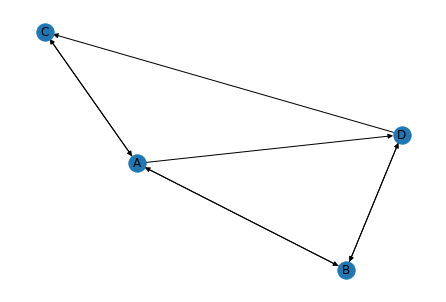

In [54]:
# 有向图可视化
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True)
plt.show()

In [55]:
# 计算简化模型的PR值
pr = nx.pagerank(G, alpha=1)
print("简化模型的PR值：", pr)

# 计算随机模型的PR值
pr = nx.pagerank(G, alpha=0.8)
print("随机模型的PR值：", pr)

简化模型的PR值： {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}
随机模型的PR值： {'A': 0.3214290507776, 'B': 0.22619031640746665, 'C': 0.22619031640746665, 'D': 0.22619031640746665}


In [56]:
## Pagerank Simulation

In [57]:
import numpy as np
a = np.array([[0, 1/2, 1, 0], 
			[1/3, 0, 0, 1/2],
			[1/3, 0, 0, 1/2],
			[1/3, 1/2, 0, 0]])
a_leak = np.array([[0, 0, 0, 1/2], 
				   [0, 0, 0, 1/2],
				   [0, 1, 0, 0],
				   [0, 0, 1, 0]])

a_sink = np.array([[0, 0, 0, 0], 
				   [1/2, 0, 0, 1],
				   [0, 1, 1, 0],
				   [1/2, 0, 0, 0]])

b = np.array([1/4, 1/4, 1/4, 1/4])
w = b

In [58]:
def work(a, w):
	for i in range(100):
		w = np.dot(a, w)
		print(w)

def random_work(a, w, n):
	d = 0.85
	for i in range(100):
		w = (1-d)/n + d*np.dot(a, w)
		print(w)

In [59]:
# work(a, w)
#random_work(a, w, 4)
#random_work(a_leak, w, 4)
random_work(a_sink, w, 4)

[0.0375  0.35625 0.4625  0.14375]
[0.0375    0.175625  0.7334375 0.0534375]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0375     0.09885938 0.81020312 0.0534375 ]
[0.0

In [60]:
### 用PageRank挖掘希拉里邮件中的重要任务关系

In [61]:
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [62]:
# 数据加载
emails = pd.read_csv("~/data/Hillary/Emails.csv")

In [63]:
# 读取别名文件
file = pd.read_csv("~/data/Hillary/Aliases.csv")
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']
# 读取人名文件
file = pd.read_csv("~/data/Hillary/Persons.csv")
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']

In [64]:
# 针对别名进行转换        
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉, 和@后面的内容
    name = name.replace(",","").split("@")[0]
    # 别名转换
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

In [65]:
# 画网络图
def show_graph(graph, type = 'spring_layout'):
    if type == 'spring_layout':
        # 使用Spring Layout布局，类似中心放射状
        positions=nx.spring_layout(graph)
    if type == 'circular_layout':
        # 使用Circular Layout布局，在一个圆环上均匀分布
        positions=nx.circular_layout(graph)

    # 设置网络图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, node_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()

In [66]:
# 将寄件人和收件人的姓名进行规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

# 设置遍的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

print(edges_weights_temp)
print('-'*100)

defaultdict(<class 'list'>, {('Jake Sullivan', 'Hillary Clinton'): 815, ('nan', 'Hillary Clinton'): 20, ('Cheryl Mills', ';h'): 1, ('Cheryl Mills', 'Hillary Clinton'): 1182, ('Hillary Clinton', 'Huma Abedin'): 32, ('Hillary Clinton', 'russorv'): 26, ('slaughter anne-marie', 'Hillary Clinton'): 126, ('Harold Hongju Koh', 'Hillary Clinton'): 12, ('Wendy Sherman', 'Hillary Clinton'): 7, ('Jake Sullivan', 'Wendy Sherman'): 1, ('Hillary Clinton', 'sullivanjj'): 288, ('Sidney Blumenthal', 'Hillary Clinton'): 361, ('Burns Strider', 'Hillary Clinton'): 2, ('Huma Abedin', 'Hillary Clinton'): 1322, ('Cheryl Mills', 'Cheryl Mills'): 17, ('Robert Russo', 'Hillary Clinton'): 22, ('Capricia Marshall', 'Cheryl Mills'): 2, ('Hillary Clinton', 'Oscar Flores'): 5, ('William Burns', 'Hillary Clinton'): 10, ('Monica Hanley', 'Hillary Clinton'): 24, ('Hillary Clinton', 'abedinh'): 345, ('Hillary Clinton', 'millscd'): 298, ('Daniel Schwerin', 'Hillary Clinton'): 9, ('Hillary Clinton', 'hanleymr'): 33, ('Mon

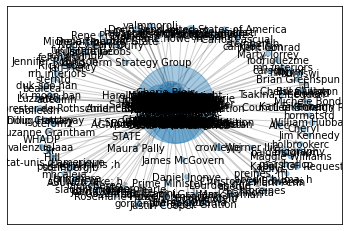

In [67]:
# 转化格式 (from, to), weight => from, to, weight
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(edges_weights)
# 计算每个节点（人）的PR值，并作为节点的pagerank属性
pagerank = nx.pagerank(graph)
# 获取每个节点的pagerank数值
pagerank_list = {node: rank for node, rank in pagerank.items()}
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank_list)
# 画网络图
show_graph(graph)

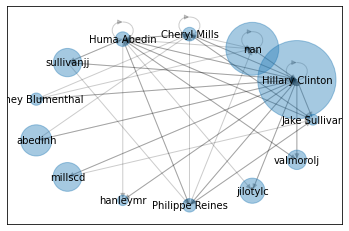

In [68]:
# 将完整的图谱进行精简
# 设置PR值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉PR值小于pagerank_threshold的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph, 'circular_layout')